In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv('C:\\Users\\nickh\\OneDrive - Northeastern University\\Notebooks\\DataMining\\Teamwork\\data\\bank-full.csv',sep=';')

In [2]:
#create dummy variables for x 
x = pd.get_dummies(df.drop('y',axis=1),drop_first=True)

#turn encode y into 0 or 1 and cast to float
y = pd.get_dummies(df['y'],drop_first=True).astype(float)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#80/20 split
x = sm.add_constant(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [5]:
#add constant and train
logit = sm.Logit(endog=y_train,exog=x_train).fit()

Optimization terminated successfully.
         Current function value: 0.236190
         Iterations 8


In [21]:
logit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                36168
Model:                          Logit   Df Residuals:                    36125
Method:                           MLE   Df Model:                           42
Date:                Sat, 30 Jan 2021   Pseudo R-squ.:                  0.3373
Time:                        22:12:27   Log-Likelihood:                -8637.0
converged:                       True   LL-Null:                       -13034.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.4050      0.205    -11.709      0.000      -2.808      -2.002
age                    -0.0008      0.002     -0.334      0.738      -0.006       0.004
balance              1.677e-05   5.59e-06      2.998      0.003    5.81e-06    2.77e-05
day                     0.0125      0.003      4.492      0.000       0.007       0.018
duration                0.0042   7.24e-05     57.766      0.000       0.004       0.004
campaign               -0.0967      0.011     -8.533      0.000      -0.119      -0.075
pdays                  -0.0003      0.000     -1.007      0.314      -0.001       0.000
previous                0.0083      0.006      1.290      0.197      -0.004       0.021
job_blue-collar        -0.3045      0.081     -3.749      0.000      -0.464      -0.145
job_entrepreneur       -0.2868      0.138     -2.082      0.037      -0.557      -0.017
job_housemaid          -0.5386      0.151     -3.558      0.000      -0.835      -0.242
job_management         -0.2185      0.082     -2.659      0.008      -0.380      -0.057
job_retired             0.2012      0.109      1.846      0.065      -0.012       0.415
job_self-employed      -0.3136      0.125     -2.500      0.012      -0.559      -0.068
job_services           -0.1867      0.093     -2.002      0.045      -0.369      -0.004
job_student             0.3409      0.122      2.791      0.005       0.101       0.580
job_technician         -0.2079      0.077     -2.691      0.007      -0.359      -0.056
job_unemployed         -0.2943      0.127     -2.315      0.021      -0.544      -0.045
job_unknown            -0.4175      0.272     -1.535      0.125      -0.951       0.116
marital_married        -0.1820      0.066     -2.751      0.006      -0.312      -0.052
marital_single          0.1065      0.076      1.409      0.159      -0.042       0.255
education_secondary     0.0962      0.071      1.346      0.178      -0.044       0.236
education_tertiary      0.3168      0.083      3.799      0.000       0.153       0.480
education_unknown       0.2023      0.116      1.745      0.081      -0.025       0.430
default_yes            -0.0473      0.190     -0.249      0.804      -0.420       0.325
housing_yes            -0.6523      0.049    -13.373      0.000      -0.748      -0.557
loan_yes               -0.4486      0.067     -6.688      0.000      -0.580      -0.317
contact_telephone      -0.1013      0.082     -1.229      0.219      -0.263       0.060
contact_unknown        -1.6406      0.082    -19.980      0.000      -1.802      -1.480
month_aug              -0.6543      0.088     -7.439      0.000      -0.827      -0.482
month_dec               0.8316      0.193      4.318      0.000       0.454       1.209
month_feb              -0.0588      0.100     -0.589      0.556      -0.254       0.137
month_jan              -1.2385      0.137     -9.054      0.000      -1.507      -0.970
month_jul              -0.7709      0.086     -8.941      0.000      -0.9

In [22]:
#look at values to include less than 0.1 specifically p-value near 0.05
var_include = round(logit.pvalues[logit.pvalues < 0.1],4)
print(var_include)

const                 0.0000
balance               0.0027
day                   0.0000
duration              0.0000
campaign              0.0000
job_blue-collar       0.0002
job_entrepreneur      0.0373
job_housemaid         0.0004
job_management        0.0078
job_retired           0.0649
job_self-employed     0.0124
job_services          0.0453
job_student           0.0053
job_technician        0.0071
job_unemployed        0.0206
marital_married       0.0059
education_tertiary    0.0001
education_unknown     0.0811
housing_yes           0.0000
loan_yes              0.0000
contact_unknown       0.0000
month_aug             0.0000
month_dec             0.0000
month_jan             0.0000
month_jul             0.0000
month_jun             0.0000
month_mar             0.0000
month_may             0.0000
month_nov             0.0000
month_oct             0.0000
month_sep             0.0000
poutcome_other        0.0901
poutcome_success      0.0000
dtype: float64


In [23]:
#raise the log odd coef by base e
np.exp(logit.params[var_include.index])

const                 0.090267
balance               1.000017
day                   1.012582
duration              1.004193
campaign              0.907795
job_blue-collar       0.737461
job_entrepreneur      0.750672
job_housemaid         0.583540
job_management        0.803699
job_retired           1.222891
job_self-employed     0.730831
job_services          0.829687
job_student           1.406180
job_technician        0.812252
job_unemployed        0.745036
marital_married       0.833564
education_tertiary    1.372739
education_unknown     1.224194
housing_yes           0.520835
loan_yes              0.638505
contact_unknown       0.193862
month_aug             0.519820
month_dec             2.297103
month_jan             0.289824
month_jul             0.462617
month_jun             1.622361
month_mar             4.942215
month_may             0.682573
month_nov             0.410547
month_oct             2.389040
month_sep             2.310772
poutcome_other        1.188497
poutcome

In [24]:
logit.predict(x_test)

29727    0.056221
29701    0.107332
41394    0.586792
19944    0.043660
4995     0.015061
           ...   
3627     0.027476
31741    0.045004
22846    0.258299
30552    0.190518
21494    0.033916
Length: 9043, dtype: float64

In [25]:
logit.pred_table(optimal_proba_cutoff)

NameError: name 'optimal_proba_cutoff' is not defined

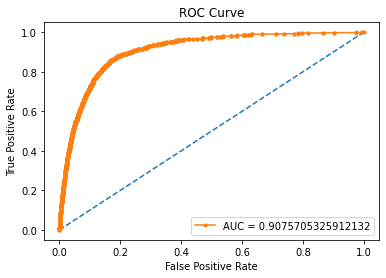

In [32]:
false_pos_rate, true_pos_rate, proba= metrics.roc_curve(y_test, logit.predict(x_test))
plt.figure()
plt.plot([0,1], [0,1], linestyle="--") # plot random curve
plt.plot(false_pos_rate, true_pos_rate, marker=".", label=f"AUC = {roc_auc_score(y_test, logit.predict(x_test))}")
plt.title("ROC Curve")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.legend(loc="lower right")

In [33]:
optimal_proba_cutoff = sorted(list(zip(np.abs(true_pos_rate - false_pos_rate), proba)), key=lambda i: i[0], reverse=True)[0][1]
roc_predictions = [1 if i >= optimal_proba_cutoff else 0 for i in logit.predict(x_test)]
print(optimal_proba_cutoff)

0.11172114638248809


In [ ]:
confusion_matrix(y_test,roc_predictions)